## import libraries

In [12]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [2]:
opinions = pd.read_csv("./consolidated_opinions.csv", encoding="UTF-8")

In [3]:
opinions = opinions[['opinion', 'score', 'sentiment']]

In [4]:
opinions.sentiment = opinions.sentiment.str.lower()

In [5]:
opinions = opinions.dropna(subset=['opinion'])

sa = SentimentIntensityAnalyzer()

opinions["vader"] = opinions.opinion.apply(lambda o: sa.polarity_scores(str(o)))

In [6]:

sentiment = pd.concat([opinions, opinions['vader'].apply(pd.Series)], axis=1).drop(columns=['vader'])

In [7]:
sentiment

,opinion,score,sentiment,neg,neu,pos,compound
200,Absolutely love this product!,5.0,positive,0.000,0.385,0.615,0.6989
201,Super convenient and reliable.,5.0,positive,0.000,0.435,0.565,0.5994
202,Absolutely love this product!,5.0,positive,0.000,0.385,0.615,0.6989
203,I would definitely buy it again.,5.0,positive,0.000,0.649,0.351,0.4019
204,Great quality and easy to use.,4.0,positive,0.000,0.364,0.636,0.7906
...,...,...,...,...,...,...,...
4795,Too complex for its own good. Late game lag is...,2.0,negative,0.218,0.648,0.134,-0.2023
4796,1945 runs at 1 frame per minute.,2.0,negative,0.000,1.000,0.000,0.0000
4797,1000 hours in and I'm just getting started. Th...,4.0,positive,0.000,0.892,0.108,0.4404
4798,"Game crashed, opened it again immediately.",4.0,positive,0.000,1.000,0.000,0.0000


In [8]:
sentiment['vader_sentiment'] = sentiment.apply(
    lambda row: 'positive' if row['compound'] >= 0.05 else ('negative' if row['compound'] <= -0.05 else 'neutral'),axis=1)

In [9]:

missclassified = confusion_matrix(sentiment['sentiment'].astype(str), sentiment['vader_sentiment'].astype(str), labels=['positive', 'neutral', 'negative'])

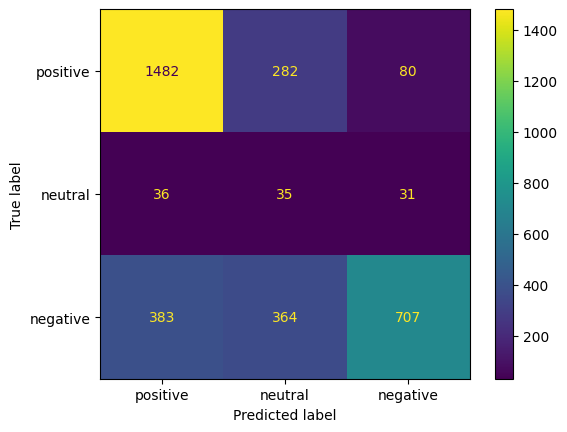

In [13]:

ConfusionMatrixDisplay(missclassified, display_labels=['positive', 'neutral', 'negative']).plot()

In [14]:

report = classification_report(sentiment['sentiment'].astype(str), sentiment['vader_sentiment'].astype(str), labels=['positive', 'neutral', 'negative'], output_dict=True)

In [15]:

report_df = pd.DataFrame(report).transpose()

In [16]:

report_df

,precision,recall,f1-score,support
positive,0.690909,0.803688,0.743043,1844.0
neutral,0.044192,0.343137,0.078300,102.0
negative,0.819235,0.486245,0.610272,1454.0
micro avg,0.585263,0.654118,0.617778,3400.0
macro avg,0.518112,0.544357,0.477205,3400.0
weighted avg,0.726386,0.654118,0.666322,3400.0


# Save results

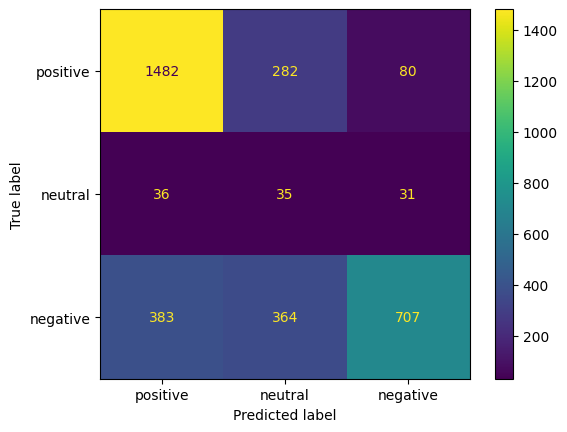

In [17]:

sentiment.to_csv('./sentiment_analysis_vader.csv', index=False, encoding='utf-8')
report_df.to_csv('./classification_report_vader.csv', index=True, encoding='utf-8')
missclassified_df = pd.DataFrame(missclassified, 
                                 index=['actual_positive', 'actual_neutral', 'actual_negative'],
                                 columns=['predicted_positive', 'predicted_neutral', 'predicted_negative'])
ConfusionMatrixDisplay(missclassified, display_labels=['positive', 'neutral', 'negative']).plot().figure_.savefig('./confusion_matrix_vader.png')